<a href="https://colab.research.google.com/github/aswathim3844/paatshala-assessment/blob/main/feature_engineering_assessment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
df = pd.read_excel("/content/Sample - Superstore.xls")
df = pd.DataFrame(df)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2017-04-30 05:17:08.056834048,2017-05-04 04:17:20.304182528,55245.233297,229.858001,3.789574,0.156203,28.656896
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2016-05-23 00:00:00,2016-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2018-05-14 00:00:00,2018-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108


In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9984,9985,CA-2016-100251,2016-05-17,2016-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561.0,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2016-100251,2016-05-17,2016-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561.0,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9986,9987,CA-2017-125794,2017-09-29,2017-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008.0,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2018-163629,2018-11-17,2018-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605.0,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2018-163629,2018-11-17,2018-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605.0,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2018-119914,2018-05-04,2018-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [8]:
#finding null values
print(df.isnull().sum())



#we get the insight that only postal code has 11 null values

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64


In [9]:
#finding unique values
print(df.nunique())

Row ID           9994
Order ID         5009
Order Date       1236
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       630
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64


In [10]:
print(df['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


In [11]:
print(df['Sub-Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [12]:
print(df['Region'].value_counts())

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64


In [13]:
city_grouped = df.groupby("City")["Sales"].count().reset_index()
city_grouped

,City,Sales
0,Aberdeen,1
1,Abilene,1
2,Akron,21
3,Albuquerque,14
4,Alexandria,25
...,...,...
526,Woonsocket,4
527,Yonkers,15
528,York,5
529,Yucaipa,1


In [14]:
sales_customer = df.groupby("Customer ID")["Sales"].count().reset_index()
sales_customer

,Customer ID,Sales
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6
...,...,...
788,XP-21865,28
789,YC-21895,8
790,YS-21880,12
791,ZC-21910,31


In [15]:
cust_order=df.groupby("Customer ID")["Order ID"].count().reset_index()
cust_order

,Customer ID,Order ID
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6
...,...,...
788,XP-21865,28
789,YC-21895,8
790,YS-21880,12
791,ZC-21910,31


#visualization

##univariate analysis

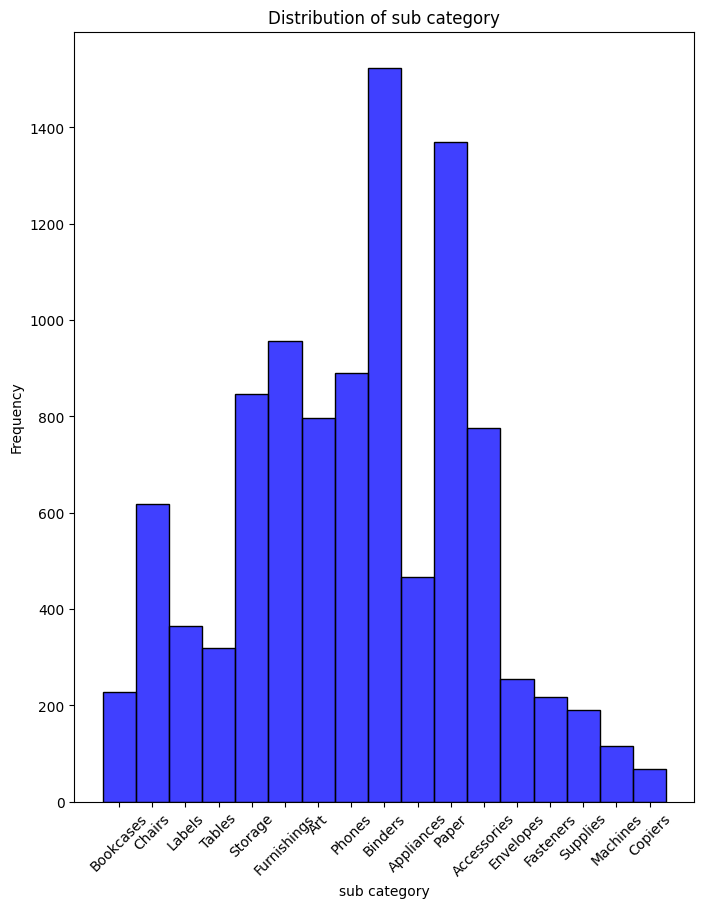

In [16]:

#plotting the histogram of sub-category


plt.figure(figsize=(8,10))
sns.histplot(df["Sub-Category"],bins=40, color="blue")
plt.title("Distribution of sub category")
plt.xlabel("sub category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

we get the insight that most purchased item is binders and least purchased is copiers


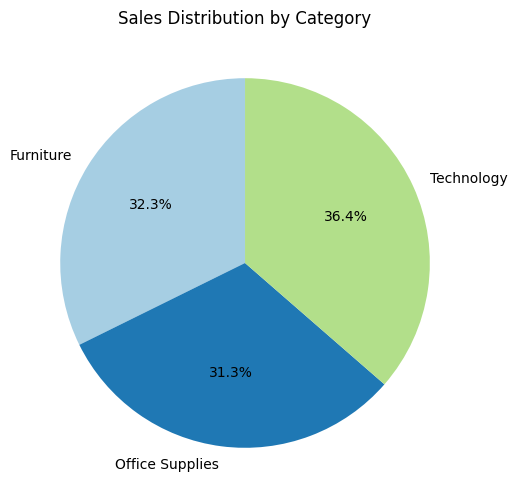

In [17]:
#plotting piechart of sales on category



sales_by_category = df.groupby("Category")["Sales"].sum()

plt.figure(figsize=(6,6))
plt.pie(
    sales_by_category,
    labels=sales_by_category.index,
    autopct="%.1f%%",
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title("Sales Distribution by Category")
plt.show()


##Bivariate analysis


###numerical VS numerical

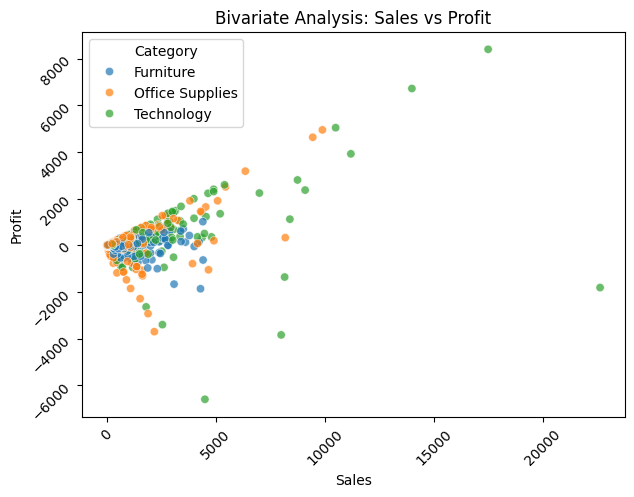

In [18]:
#plotting scatterplot on profit VS sales by category

plt.figure(figsize=(7,5))
sns.scatterplot(x="Sales", y="Profit", data=df, hue="Category", alpha=0.7)
plt.title("Bivariate Analysis: Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.xticks(rotation= 45)
plt.yticks(rotation= 45)
plt.show()

Profitability of Categories: Technology and Furniture categories have data points with high sales and profits, suggesting they are generally more profitable. Office Supplies also shows profitable sales, but the highest profits seem to be concentrated in Technology and Furniture.

Losses: There are significant losses across all categories, indicated by the data points below the zero profit line. These losses occur at various sales levels, highlighting that high sales do not always guarantee profit.

Outliers: There are some outlier data points with very high sales, particularly in the Technology and Furniture categories. These high-value sales often correspond to high profits but can also result in significant losses (as seen with the large negative profit outlier).

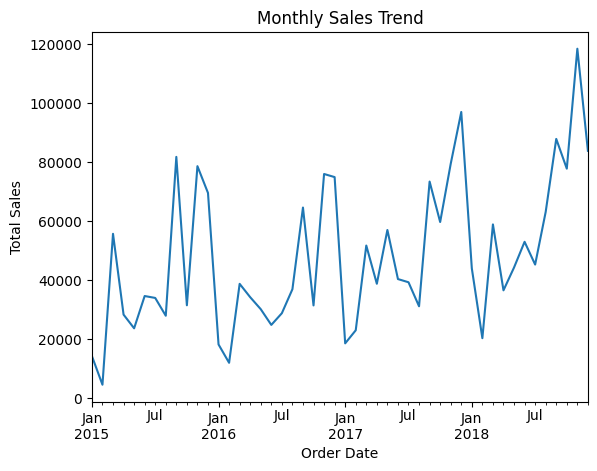

In [19]:
#MONTHLY SALES DATA


# Convert 'Order Date' to datetime objects and set as index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Resample data to monthly sums and plot
monthly_sales = df['Sales'].resample('ME').sum()
monthly_sales.plot(title='Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.show()

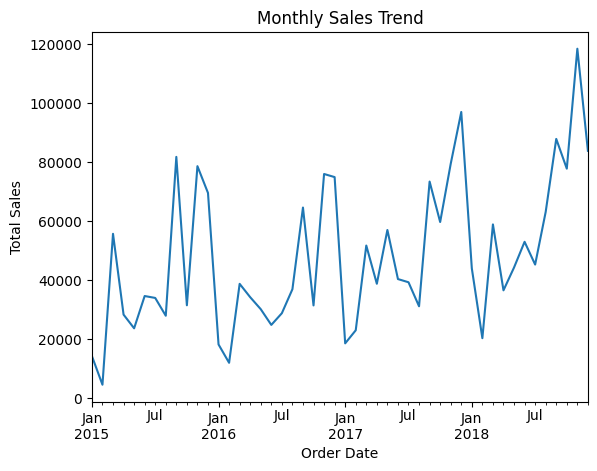

In [20]:
#MONTHLY SALES DATA


# Convert 'Order Date' to datetime objects and set as index
df = df.reset_index()
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Resample data to monthly sums and plot
monthly_sales = df['Sales'].resample('ME').sum()
monthly_sales.plot(title='Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.show()

shows how the sales varies during each month,it showa a pattern that sales increases to the end of the year


###numerical VS categorical

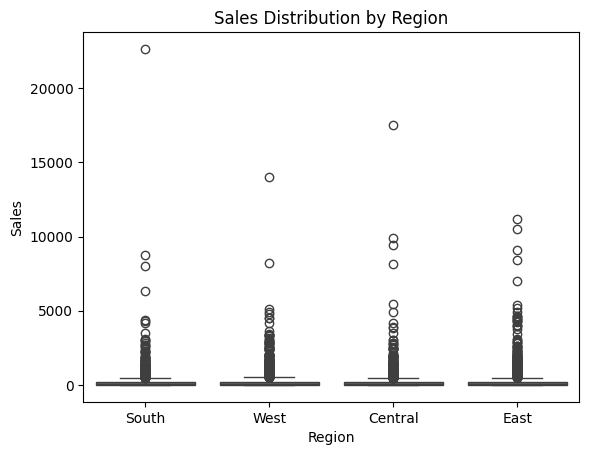

In [21]:


#boxplot of sales VS region

sns.boxplot(data=df, x='Region', y='Sales')
plt.title('Sales Distribution by Region')
plt.show()

 while the typical sales amount and the spread of the majority of sales are similar across the South, West, Central, and East regions, all regions experience high-value outlier sales that can skew the overall sales figures.

###categorical vs categorical

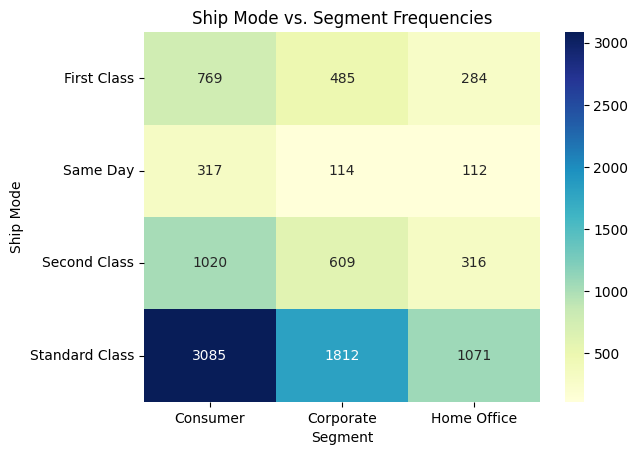

In [22]:
#heatmap on shipmode vs segment

contingency_table = pd.crosstab(df['Ship Mode'], df['Segment'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Ship Mode vs. Segment Frequencies')
plt.show()

The heatmap of Ship Mode vs. Segment Frequencies shows the number of orders for each combination of shipping mode and customer segment. Here are some insights we can get from this heatmap:

Overall Most Frequent Ship Mode: The "Standard Class" ship mode is the most frequently used across all segments, as indicated by the largest numbers in the bottom row of the heatmap.
Segment Preferences:
Consumer Segment: The Consumer segment uses "Standard Class" most frequently, followed by "Second Class", "First Class", and then "Same Day".
Corporate Segment: Similar to the Consumer segment, the Corporate segment also uses "Standard Class" most often, followed by "Second Class", "First Class", and "Same Day".
Home Office Segment: The Home Office segment also shows a preference for "Standard Class", followed by "Second Class", "First Class", and "Same Day".
Least Frequent Ship Mode: "Same Day" shipping is the least frequent ship mode across all segments.
Relative Usage: While "Standard Class" is the most popular in all segments, the heatmap allows us to see the relative usage of other shipping modes within each segment. For example, the difference in the number of orders between "Standard Class" and "Second Class" is larger for the Consumer segment than for the Home Office segment.

##multivariate analysis

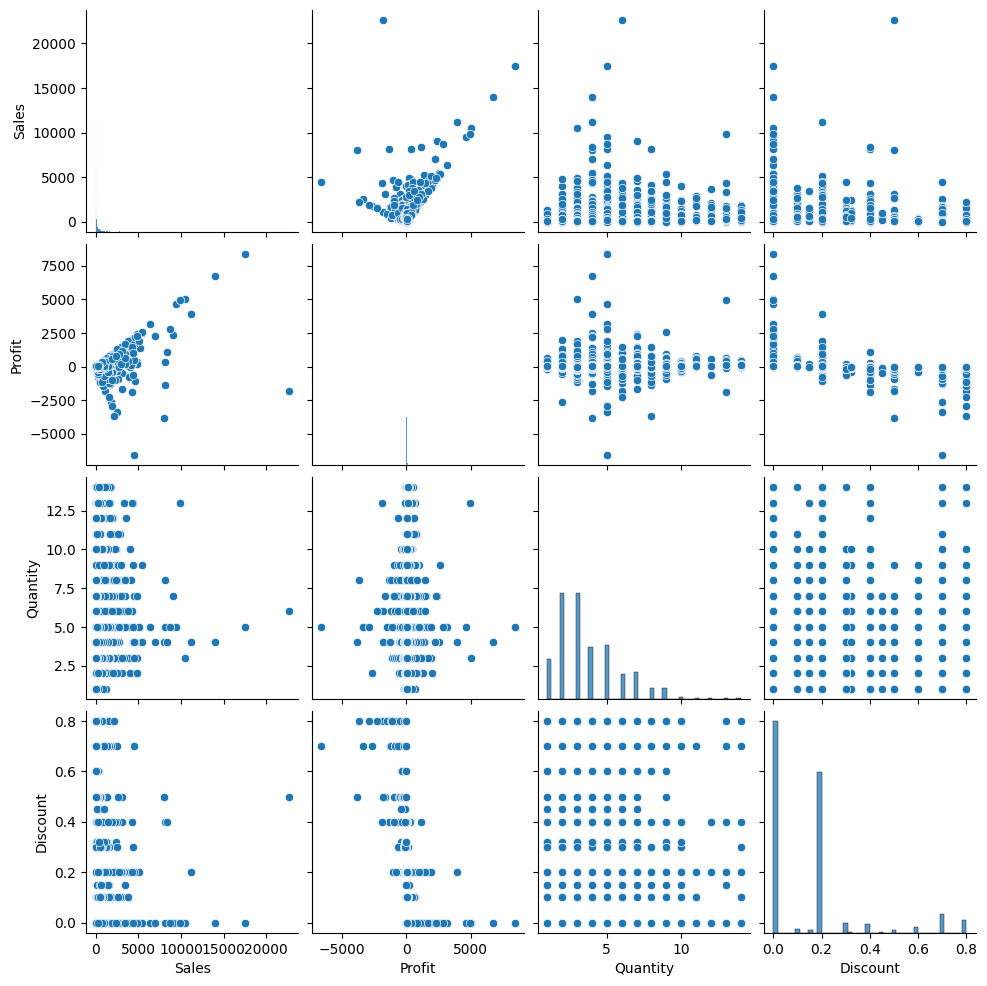

In [24]:
sns.pairplot(df[['Sales', 'Profit', 'Quantity', 'Discount']])
plt.show()

The pair plot shows the relationships between pairs of numerical variables: Sales, Profit, Quantity, and Discount. Here are some key insights from the pair plot:

####Sales vs. Profit:
 This scatter plot,shows a general positive correlation, but also highlights significant losses at various sales levels and high-value outliers.


####Sales vs. Quantity:
There appears to be a positive correlation between Sales and Quantity, meaning that as the quantity of items purchased increases, the total sales also tend to increase. However, there's a wide spread of sales values for the same quantity, indicating that the price of individual items varies greatly.

####Sales vs. Discount:
This plot shows that higher discounts are often associated with lower sales, although there are some exceptions. There are also many data points with zero discount across a wide range of sales values. The points with high discounts also tend to have lower sales, and it is possible that high discounts are given to clear out less popular items or to encourage sales of lower-priced items.


####Profit vs. Quantity:
There doesn't seem to be a strong linear relationship between Profit and Quantity. We see both profitable and unprofitable transactions across different quantities.

####Profit vs. Discount:
 This plot shows a clear negative relationship between Profit and Discount. As the discount increases, the profit tends to decrease, and transactions with high discounts are often associated with significant losses. This is a crucial insight, suggesting that high discounts are detrimental to profitability.
####Quantity vs. Discount:
This scatter plot shows that discounts are applied across various quantities. There doesn't appear to be a strong pattern indicating that higher quantities automatically receive higher or lower discounts.